In [ ]:
from PIL import Image
import numpy as np

image = Image.open('/dog.jpg')
image_array = np.array(image).astype(np.float32)

mean = 0
std = 15

gaussian_noise = np.random.normal(mean, std, image_array.shape)
noisy_image = image_array + gaussian_noise
noisy_image = np.clip(noisy_image, 0, 255)
noisy_image = noisy_image.astype(np.uint8)

noisy_pil = Image.fromarray(noisy_image)

noisy_pil.save('dog_noisy.jpg')
image.show()
noisy_pil.show()

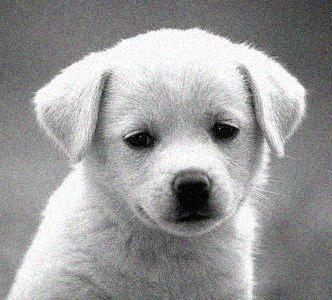

In [ ]:
from IPython.display import Image, display

display(Image('dog_noisy.jpg'))

In [ ]:

import numpy as np
from PIL import Image

def convolve2d(image, kernel):
    img_h, img_w = image.shape
    k_h, k_w = kernel.shape

    pad_h = k_h // 2
    pad_w = k_w // 2


    padded = np.pad(image,
                    ((pad_h, pad_h), (pad_w, pad_w)),
                    mode='constant', constant_values=0)


    kernel_flipped = np.flipud(np.fliplr(kernel))

    output = np.zeros((img_h, img_w))

    for i in range(img_h):
        for j in range(img_w):
            region = padded[i:i+k_h, j:j+k_w]
            output[i, j] = np.sum(region * kernel_flipped)

    return output

def gaussian_kernel(size=7, sigma=1.0):
    ax = np.linspace(-(size//2), size//2, size)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))


    kernel = kernel / np.sum(kernel)

    return kernel

image = Image.open('dog_noisy.jpg').convert('L')
image_array = np.array(image).astype(np.float32)

gaussian = gaussian_kernel(size=7, sigma=1.0)

denoised = convolve2d(image_array, gaussian)

denoised = np.clip(denoised, 0, 255).astype(np.uint8)

Image.fromarray(denoised).save('dog_denoised.jpg')

sharpening_kernel = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 26, -476, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
]) * (-1.0 / 256.0)

sharpened = convolve2d(denoised.astype(np.float32), sharpening_kernel)

sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

Image.fromarray(sharpened).save('dog_sharpened.jpg')
Image.fromarray(sharpened).show()

In [ ]:
import numpy as np
from PIL import Image

def convolve2d(image, kernel):

    img_h, img_w = image.shape
    k_h, k_w = kernel.shape


    pad_h = k_h // 2
    pad_w = k_w // 2


    padded_image = np.pad(image,
                          ((pad_h, pad_h), (pad_w, pad_w)),
                          mode='constant',
                          constant_values=0)


    flipped_kernel = np.flipud(np.fliplr(kernel))


    output = np.zeros((img_h, img_w))


    for i in range(img_h):
        for j in range(img_w):
            region = padded_image[i:i+k_h, j:j+k_w]
            output[i, j] = np.sum(region * flipped_kernel)

    return output



image = Image.open('/dog.jpg').convert('L')
image_array = np.array(image)


Kernel = np.array([[1, 0, -1],
                   [2, 0, -2],
                   [1, 0, -1]])


convolved_image = convolve2d(image_array, Kernel)


convolved_image = np.clip(convolved_image, 0, 255)
convolved_image = convolved_image.astype(np.uint8)


result_image = Image.fromarray(convolved_image)
result_image.save('dog_convolved.jpg')
result_image.show()

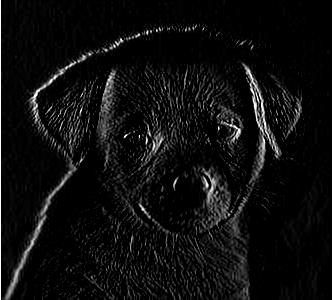

In [ ]:
from IPython.display import Image, display

display(Image('dog_convolved.jpg'))

In [ ]:
import numpy as np
from PIL import Image

def convolve2d(image, kernel):
    img_h, img_w = image.shape
    k_h, k_w = kernel.shape

    pad_h = k_h // 2
    pad_w = k_w // 2


    padded = np.pad(image,
                    ((pad_h, pad_h), (pad_w, pad_w)),
                    mode='constant', constant_values=0)


    kernel_flipped = np.flipud(np.fliplr(kernel))

    output = np.zeros((img_h, img_w))

    for i in range(img_h):
        for j in range(img_w):
            region = padded[i:i+k_h, j:j+k_w]
            output[i, j] = np.sum(region * kernel_flipped)

    return output

def gaussian_kernel(size=7, sigma=1.0):
    ax = np.linspace(-(size//2), size//2, size)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))


    kernel = kernel / np.sum(kernel)

    return kernel

image = Image.open('dog_noisy.jpg').convert('L')
image_array = np.array(image).astype(np.float32)

gaussian = gaussian_kernel(size=7, sigma=1.0)

denoised = convolve2d(image_array, gaussian)

denoised = np.clip(denoised, 0, 255).astype(np.uint8)

Image.fromarray(denoised).save('dog_denoised.jpg')

sharpening_kernel = np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 26, -476, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
]) * (-1.0 / 256.0)

sharpened = convolve2d(denoised.astype(np.float32), sharpening_kernel)

sharpened = np.clip(sharpened, 0, 255).astype(np.uint8)

Image.fromarray(sharpened).save('dog_sharpened.jpg')
Image.fromarray(sharpened).show()

Original Image:


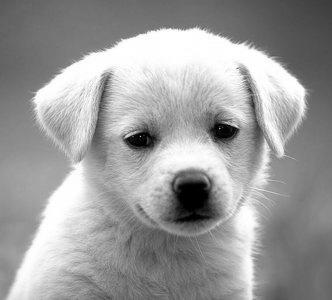

Sharpened Image:


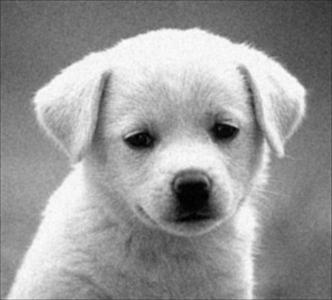

In [ ]:
from IPython.display import Image, display

print('Original Image:')
display(Image('/dog.jpg'))

print('Sharpened Image:')
display(Image('dog_sharpened.jpg'))

task 4

Max Convolution Score: 2341734.25
Max Convolution Location (row, col): (np.int64(342), np.int64(172))
Max Correlation Score: 3929282.5
Max Correlation Location (row, col): (np.int64(36), np.int64(60))


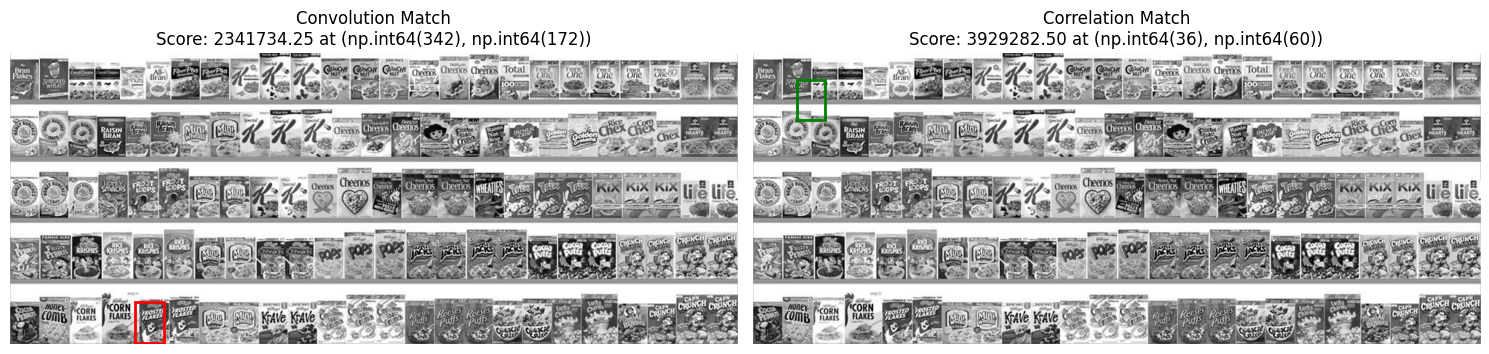

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def convolve2d(image, kernel):
    img_h, img_w = image.shape
    k_h, k_w = kernel.shape

    pad_h = k_h // 2
    pad_w = k_w // 2

    padded_image = np.pad(image,
                          ((pad_h, pad_h), (pad_w, pad_w)),
                          mode='constant',
                          constant_values=0)

    flipped_kernel = np.flipud(np.fliplr(kernel))

    output = np.zeros((img_h, img_w))

    for i in range(img_h):
        for j in range(img_w):
            region = padded_image[i:i+k_h, j:j+k_w]
            output[i, j] = np.sum(region * flipped_kernel)

    return output

def correlate2d(image, kernel):
    img_h, img_w = image.shape
    k_h, k_w = kernel.shape

    pad_h = k_h // 2
    pad_w = k_w // 2

    padded_image = np.pad(image,
                          ((pad_h, pad_h), (pad_w, pad_w)),
                          mode='constant',
                          constant_values=0)

    output = np.zeros((img_h, img_w))

    for i in range(img_h):
        for j in range(img_w):
            region = padded_image[i:i+k_h, j:j+k_w]
            output[i, j] = np.sum(region * kernel)

    return output


main_image = Image.open('/shelf.jpg').convert('L')
template_image = Image.open('/template.jpg').convert('L')


main_image_array = np.array(main_image).astype(np.float32)
template_image_array = np.array(template_image).astype(np.float32)


mean_subtracted_main_image = main_image_array - np.mean(main_image_array)
mean_subtracted_template_image = template_image_array - np.mean(template_image_array)


template_h, template_w = template_image_array.shape

convolution_result = convolve2d(mean_subtracted_main_image, mean_subtracted_template_image)
correlation_result = correlate2d(mean_subtracted_main_image, mean_subtracted_template_image)


max_conv_score = np.max(convolution_result)
max_conv_loc = np.unravel_index(np.argmax(convolution_result), convolution_result.shape)

max_corr_score = np.max(correlation_result)
max_corr_loc = np.unravel_index(np.argmax(correlation_result), correlation_result.shape)


print(f"Max Convolution Score: {max_conv_score}")
print(f"Max Convolution Location (row, col): {max_conv_loc}")
print(f"Max Correlation Score: {max_corr_score}")
print(f"Max Correlation Location (row, col): {max_corr_loc}")


fig, axes = plt.subplots(1, 2, figsize=(15, 7))


axes[0].imshow(main_image, cmap='gray')
rect_conv = patches.Rectangle((max_conv_loc[1], max_conv_loc[0]), template_w, template_h,
                            linewidth=2, edgecolor='r', facecolor='none')
axes[0].add_patch(rect_conv)
axes[0].set_title(f'Convolution Match\nScore: {max_conv_score:.2f} at {max_conv_loc}')
axes[0].axis('off')


axes[1].imshow(main_image, cmap='gray')
rect_corr = patches.Rectangle((max_corr_loc[1], max_corr_loc[0]), template_w, template_h,
                            linewidth=2, edgecolor='g', facecolor='none')
axes[1].add_patch(rect_corr)
axes[1].set_title(f'Correlation Match\nScore: {max_corr_score:.2f} at {max_corr_loc}')
axes[1].axis('off')

plt.tight_layout()
plt.show()

### e. Which method more accurately locates the product?

**Correlation typically performs better for template matching.**

**Why?**

- Correlation preserves the original orientation of the template.
- Convolution flips the template before comparison.
- If the object is not symmetric, flipping may reduce similarity.
- Template matching is fundamentally about measuring similarity, not filtering.

Therefore, correlation usually produces a more accurate location of the product on the shelf.

---

### f. Which method is more efficient?

**Correlation is slightly more efficient in practice.**

**Reasons:**

- No flipping step is required.
- Conceptually simpler to implement.
- Most computer vision libraries (e.g., OpenCV `matchTemplate`) use correlation.
- Both methods have similar computational complexity:

\[
O(HW \cdot hw)
\]

Where:
- \( H, W \) = dimensions of the shelf image  
- \( h, w \) = dimensions of the template  

Although complexity is the same, correlation avoids unnecessary preprocessing (flipping).

---

### g. Why is one method better suited?

**Correlation is better suited for template matching.**

**Because:**

- Template matching measures similarity between image regions.
- We want direct comparison between the template and the image patch.
- Flipping (used in convolution) is intended for signal filtering, not similarity detection.

In real-world computer vision:

Template matching is almost always implemented using **correlation**